# Geopandas Exercise
* Create a geodataframe from a CSV file with coordinate columns
* Create a geodataframe from a shapefile
* Exploring and Plotting geodataframes
* Attribute subset
* Dissolving features
* Spatial subsets
* Spatial joins

In [1]:
#Read in the packages
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

### 1. Fetching and exploring spatial data 
► **Q1.1** Read the `Permitted_Animal_Facilities.csv` file into a geodataframe called `gdf_animal`. Assume the coordinate columns (`Location Lat Num` and `Location Long Num`) use the NAD 1983 coordinate reference system (WKID/EPSG = 4269). 

In [2]:
#Read the CSV into a Pandas dataframe
df = pd.read_csv('../Data/Permitted_Animal_Facilities.csv')
#Construct geometries from the dataframe's coordinate columns
geometries = gpd.points_from_xy(
    x=df['Location Long Num'],
    y=df['Location Lat Num']    
)
#Create a geodataframe from the dataframe, the geometry, and the coordinate reference system
gdf_animal = gpd.GeoDataFrame(
    data = df,
    geometry = geometries,
    crs = 4269
)

► **Q1.2** Plot the geodataframe as a simple point map.

<AxesSubplot: >

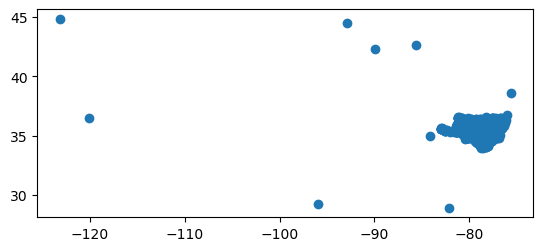

In [3]:
#Plot the geodataframe as simple points
gdf_animal.plot()

► **Q1.3** Subset points where values in the `State` column equal "NC" into a new dataframe called `gdf_animals_nc`. 

In [4]:
#Subset NC records
gdf_animal_nc = gdf_animal[gdf_animal.State == "NC"]
gdf_animal_nc

,Permit Number,Facility Name,Combined Owner,Regulated Operation,Permit Type,Regulated Activity,Allowable Count,Number Of Lagoons,Issued Date,Effective Date,...,Admin Region,County Name,Location Lat Num,Location Long Num,Address 1,Address 2,City,State,Zip,geometry
2,AWC010006,Covington Dairy Farm Inc,William Covington,Cattle,Cattle State COC,Cattle - Milk Cow,300.0,1.0,10-01-2019,10-01-2019,...,Winston-Salem,Alamance,36.044200,-79.326100,3008 S Nc119,NaN,Mebane,NC,27302.0,POINT (-79.32610 36.04420)
3,AWC010010,Triple W Farms,Harold Woody,Cattle,Cattle State COC,Cattle - Dairy Heifer,200.0,1.0,10-31-2019,10-31-2019,...,Winston-Salem,Alamance,35.904200,-79.300000,3545 E Greensboro-Chapel Hill Hwy,NaN,Snow Camp,NC,27349.0,POINT (-79.30000 35.90420)
4,AWC010010,Triple W Farms,Harold Woody,Cattle,Cattle State COC,Cattle - Milk Cow,400.0,1.0,10-31-2019,10-31-2019,...,Winston-Salem,Alamance,35.904200,-79.300000,3545 E Greensboro-Chapel Hill Hwy,NaN,Snow Camp,NC,27349.0,POINT (-79.30000 35.90420)
5,AWC010012,Lindley Dairy Inc. Farm,W Lindley,Cattle,Cattle State COC,Cattle - Milk Cow,225.0,1.0,10-01-2019,10-01-2019,...,Winston-Salem,Alamance,35.899700,-79.330600,3159 E Greensboro Chapel Hill Rd,NaN,Snow Camp,NC,27349.0,POINT (-79.33060 35.89970)
6,AWC010028,A.D. and Carlton Williard,Albert Williard,Cattle,Cattle State COC,Cattle - Milk Cow,150.0,1.0,10-01-2019,10-01-2019,...,Winston-Salem,Alamance,35.880300,-79.345600,8152 Lindley Mill Rd,NaN,Graham,NC,27253.0,POINT (-79.34560 35.88030)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531,WQ0014871,Daddy Pete's Plant Pleaser Composting Facility...,Alan Smith,NaN,Distribution of Animal Residual Solids,Animal Waste (Non-Farm Activities),NaN,NaN,12-16-2014,12-16-2014,...,Mooresville,Alexander,35.848226,-81.054292,3533 Old Mtn Rd,NaN,Stony Point,NC,286789443.0,POINT (-81.05429 35.84823)
2536,WQ0035289,Mitchell Farms Composting Facility,Shawn Mitchell,NaN,Distribution of Animal Residual Solids,Animal Waste (Non-Farm Activities),NaN,NaN,03-25-2011,03-25-2011,...,Washington,Wayne,35.298100,-77.985800,Mitchell Rd,NaN,Dudley,NC,28333.0,POINT (-77.98580 35.29810)
2539,WQ0036160,Carolina Compost,Brian Smith,NaN,Distribution of Animal Residual Solids,Animal Waste (Non-Farm Activities),NaN,NaN,09-27-2012,09-27-2012,...,Washington,Camden,36.358965,-76.164229,191 Lambs Rd,NaN,Camden,NC,27921.0,POINT (-76.16423 36.35897)
2543,WQ0037487,Farm 2029,Murphy-Brown LLC,NaN,Distribution of Animal Residual Solids,Agricultural Animal Waste,NaN,3.0,07-20-2015,07-20-2015,...,Wilmington,Duplin,35.042500,-78.033300,1575 Veachs Mill Rd,NaN,Warsaw,NC,28398.0,POINT (-78.03330 35.04250)


► **Q1.4** Plot the subset features. For full credit:
 * Assign different colors to each unique value in the `Permit Type` column
 * Use the `Set3` color map
 * Draw markers something other than the default, using an opacity of 0.4
 * Set the figuire size to 12 x 6

<AxesSubplot: >

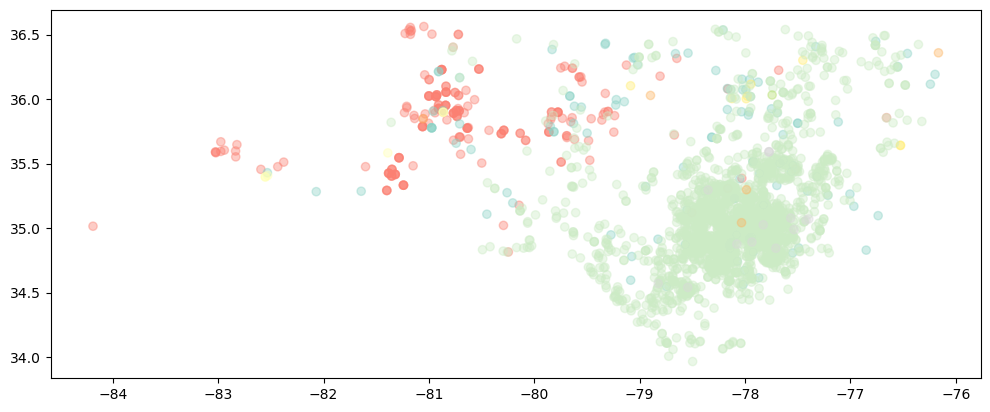

In [5]:
#Plot the NC records
gdf_animal_nc.plot(column='Permit Type',alpha=0.4, figsize=(12,6), cmap='Set3')

► **Q4** Read the `HUC12.shp` shapefile into a geodataframe named `gdf_HUC12`

In [6]:
#Read in the HUC12 feature class
gdf_HUC12 = gpd.read_file('../data/HUC12.zip') 

► **Q5** Show whether the HUC_12 geodataframes has the same coordinate reference system as the Animal Permit one.

In [7]:
#Reveal whether this and the animal permit geodataframe  
# share the same coordinate reference system
gdf_HUC12.crs == gdf_animal.crs

True

► **Q6** Plot the features so that each HUC_10 appears as a different color

<AxesSubplot: >

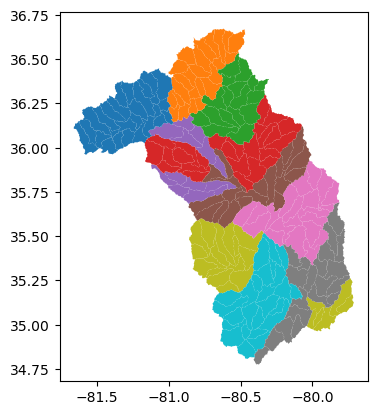

In [8]:
#Plot the features, showing HUC_10s as different colors
gdf_HUC12.plot(column='HUC_10')

► **Q7** Dissolve HUC_12 features based on the HUC_10 attribute, naming the output `gdf_HUC10`. The output should include the sum of the `ACRES` column and the first `HU_10_NAME` value. 

In [9]:
#Dissolve HUC12 features on the HUC_10 attributes & display
group10 = gdf_HUC12[['HUC_10','geometry','ACRES','HU_10_NAME']]
group10
gdf_HUC10 = group10.dissolve(
    by='HUC_10',
    aggfunc={'ACRES':'sum','HU_10_NAME':'first'})

gdf_HUC10.head()

,geometry,ACRES,HU_10_NAME
HUC_10,,,
0304010101,"POLYGON ((-81.39609 36.05608, -81.39592 36.055...",112698.0,Headwaters Yadkin River
0304010102,"POLYGON ((-81.31413 36.00396, -81.31409 36.003...",120847.0,W Kerr Scott Reservoir-Yadkin River
0304010103,"POLYGON ((-81.14188 36.05491, -81.14221 36.054...",134933.0,Reddies River-Yadkin River
0304010104,"POLYGON ((-81.00537 36.14105, -81.00539 36.141...",117712.0,Roaring River-Yadkin River
0304010105,"POLYGON ((-80.78394 36.39482, -80.78381 36.394...",69230.0,Mitchell River


► **Q8** Subset the animal permit locations that fall within the HUC_10 features. Save the output as `gdf_HUC_animals`

<AxesSubplot: >

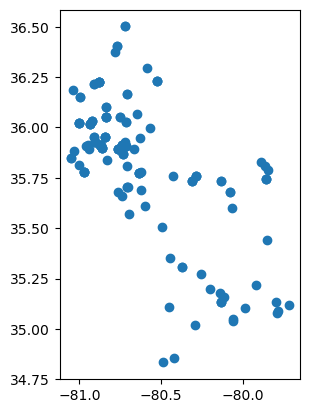

In [15]:
#Intersect the two dataframes
gdf_HUC_animals = gpd.overlay(
    df1=gdf_animal_nc,
    df2=gdf_HUC10,
    how='intersection'
)

#Plot
gdf_HUC_animals.plot()

► **Challenge question**: The `gdf_HUC_animals` dataframe now includes the HUC 10 name (in the `HU_10_NAME` attribute) for each animal permit location. We can now count the total number of animal permits in each HUC 10. Furthermore, because the Animal Permit data includes an attribute of the number of animals (`Allowable Count` attribute), we can also compute the total number of permitted animals for each HUC 12.

With this information, see if you can:
* **C1** Create a bar plot showing the number of permits by HUC 10
 * ***TIP***: The `value_counts()` function can be useful here...
* **C2** Create a bar plot showing the total allowable count of animals in each HUC 10
 * ***TIP***: You'll need to aggregate your `gdf_HUC_animal` data either via Pandas' `groupby` or GeoPandas' `dissolve` function... to compute the sum of allowable counts across each HUC10.
 * ***TIP***: To make a non-map plot from a geodataframe, you'll need to convert it to a Pandas dataframe (`pd.DataFrame(<geoDataFrame>)`)
* **C3** Create a plot of HUC10s colored by the number of permits or the number of allowed animals in each. 
 * _I actually give you the code to plot # of permits per HUC_10 (below), but see if you can alter the code to show the total allowable count by HUC_10. Then, see if you can divide the values by area to compute density of permits and/or allowable count in each HUC_10..._

<AxesSubplot: >

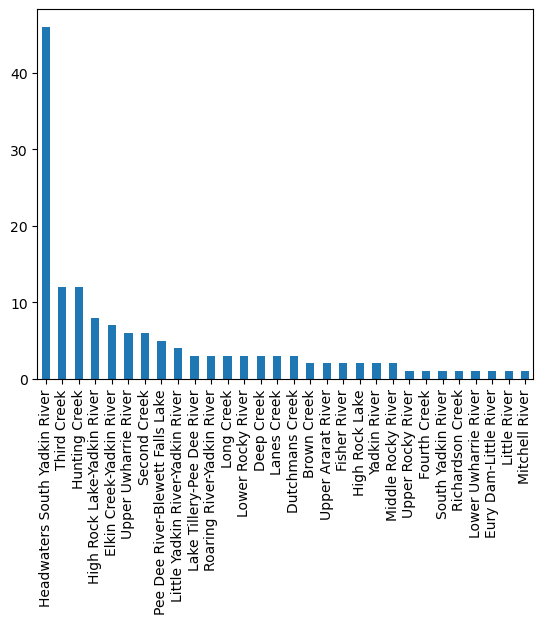

In [16]:
#Create a bar plot of # of permits in each HUC 10
gdf_HUC_animals['HU_10_NAME'].value_counts().plot(kind='bar')

<AxesSubplot: xlabel='HU_10_NAME'>

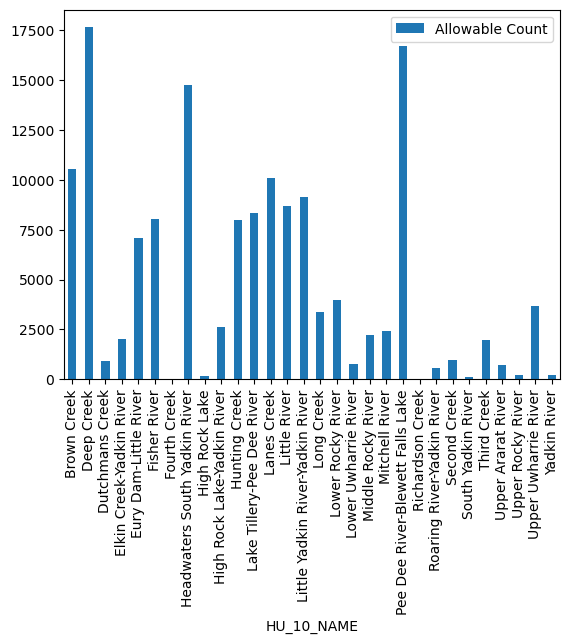

In [17]:
#Create a bar plot of the total # of allowable animals in each HUC 10
gdf_HUC10_animal=gdf_HUC_animals.dissolve(
    by='HU_10_NAME',
    aggfunc={'Allowable Count':'sum'})
gdf_HUC10_animal.sort_index().plot.bar(y='Allowable Count')

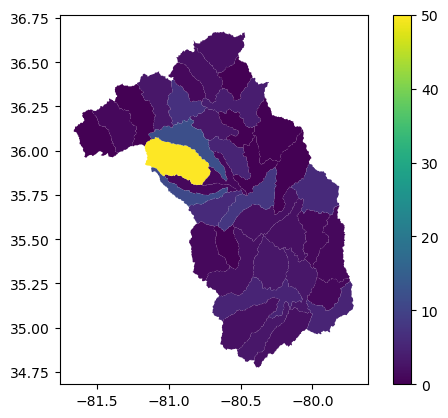

In [18]:
## Plot the # of permits in each HUC 10

#Spatially join the animal permits to each HUC 10 feature
gdf_sjoin = gpd.sjoin(left_df=gdf_HUC10,
                      right_df=gdf_animal,
                      how='left',
                      predicate='contains')
#Dissolve on HUC 10
gdf_sjoin_HUC10 = gdf_sjoin.dissolve('HU_10_NAME',aggfunc={'Allowable Count':'count','ACRES':'sum'})

#Plot based on Allowable Count attribute
gdf_sjoin_HUC10.plot('Allowable Count',legend=True);

<AxesSubplot: >

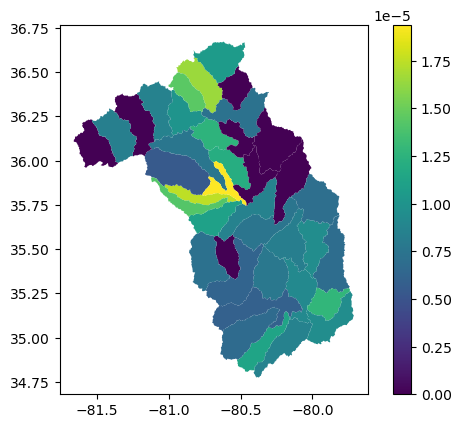

In [19]:
#Plot the # of permits per acre
gdf_sjoin_HUC10['countPerAcre'] = gdf_sjoin_HUC10['Allowable Count']/gdf_sjoin_HUC10['ACRES']
gdf_sjoin_HUC10.plot('countPerAcre',legend=True)
#mine was 1000 times smaller than the map in the key .html?